In [1]:
## Step 1.1: Importing the Required Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## Step 1.2: Reading and Understanding the data
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking for null values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking for number of unique values
day.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
#Check for all column names
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
## Step 1.3: Cleaning Data (no missing values as per above analysis)

# Dropping casual and registered columns, as cnt column will be used for analysis
day.drop(['casual'], axis = 1, inplace = True)
day.drop(['registered'], axis = 1, inplace = True)

# Dropping dteday, as month and weekday columns will be used for analysis
day.drop(['dteday'], axis = 1, inplace = True)

# Dropping instant column, as it is index column and not relevant for analysis
day.drop(['instant'], axis = 1, inplace = True)

In [10]:

## Step 1.4: EDA

#Converting categorical data as per data dictionary

day.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)

day.weathersit.replace({1:'Clear', 2:'Misty', 3:'Light Rain', 4:'Heavy Rain'},inplace = True)

day.mnth.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'},inplace = True)

day.weekday.replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'},inplace = True)


num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


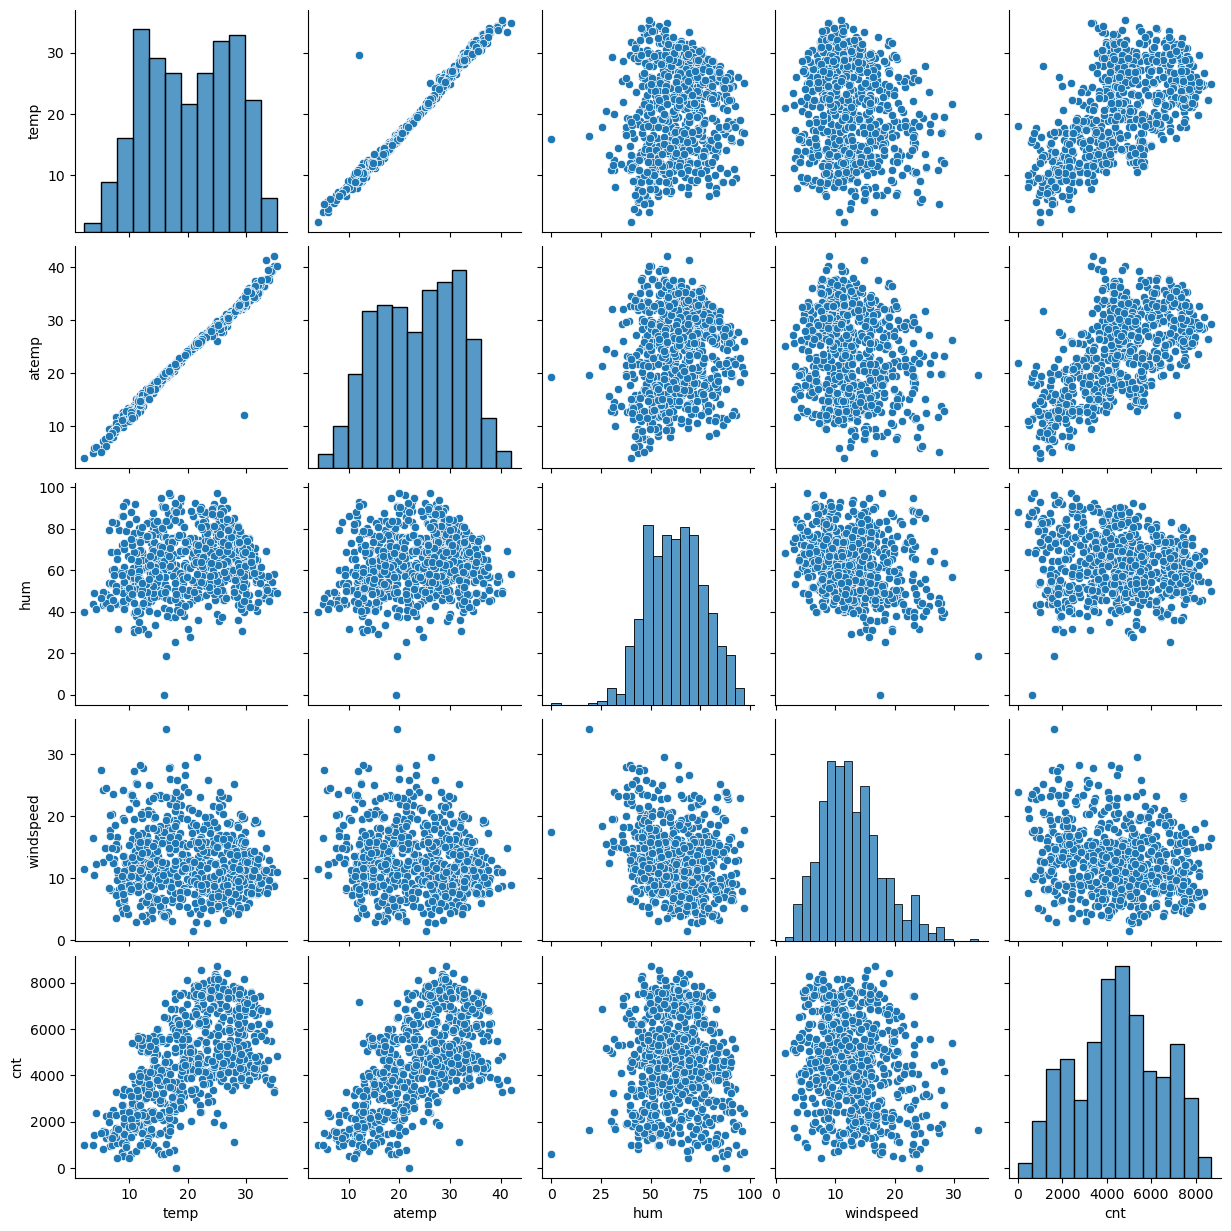

In [11]:
sns.pairplot(data=day, vars=num_cols)
plt.show()

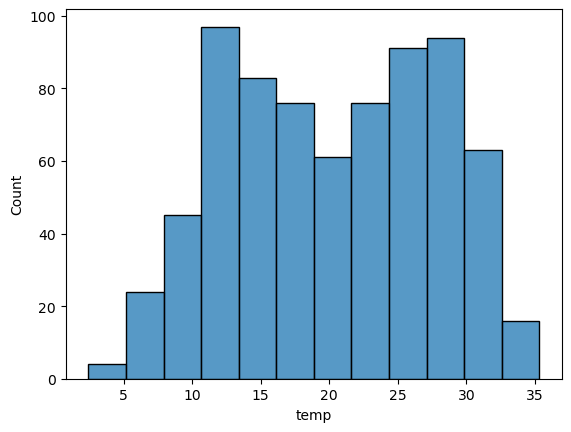

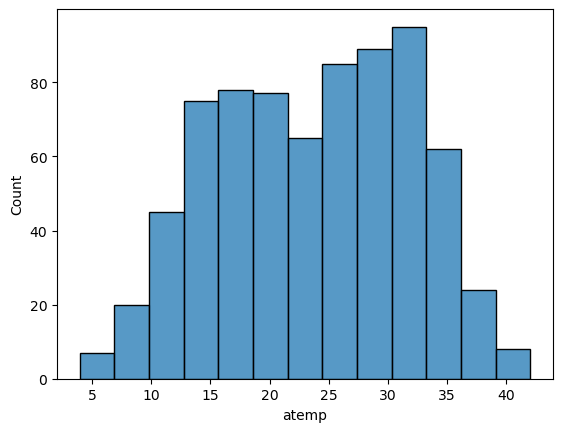

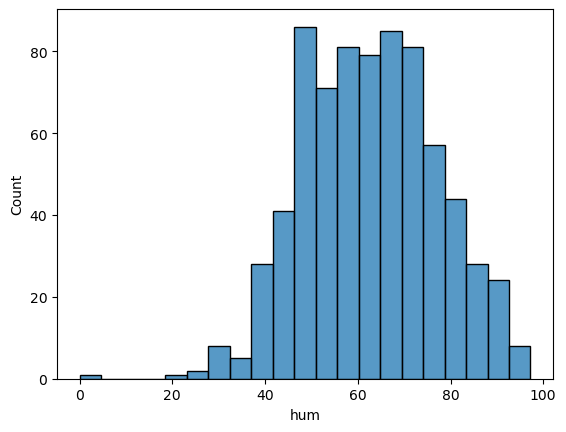

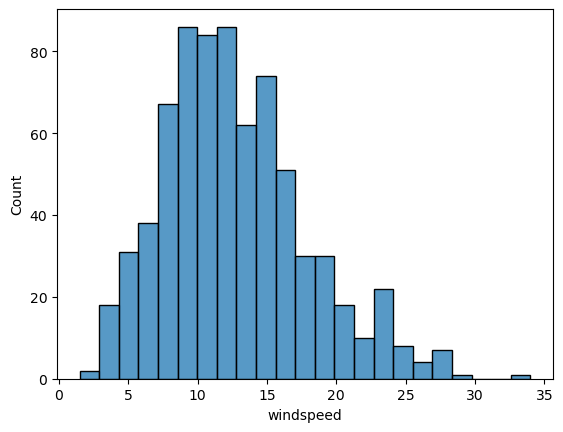

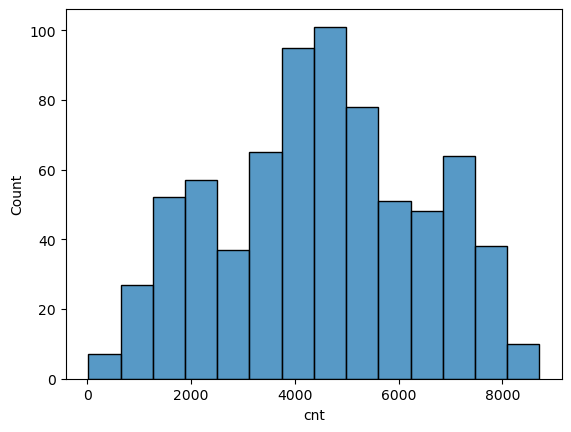

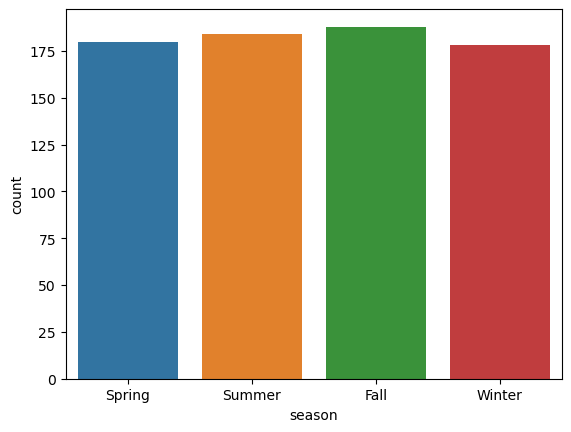

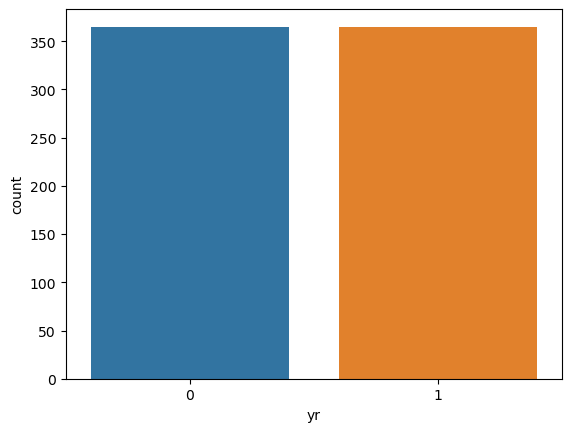

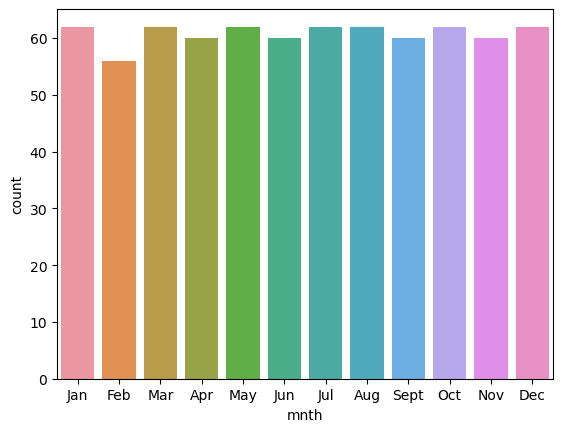

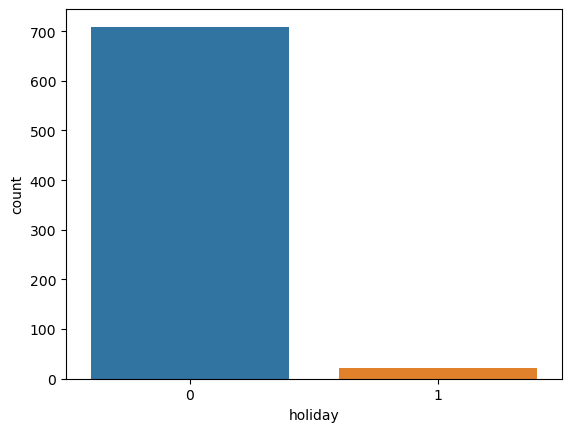

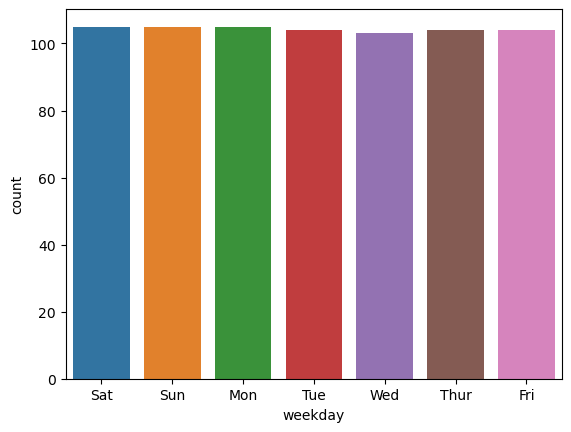

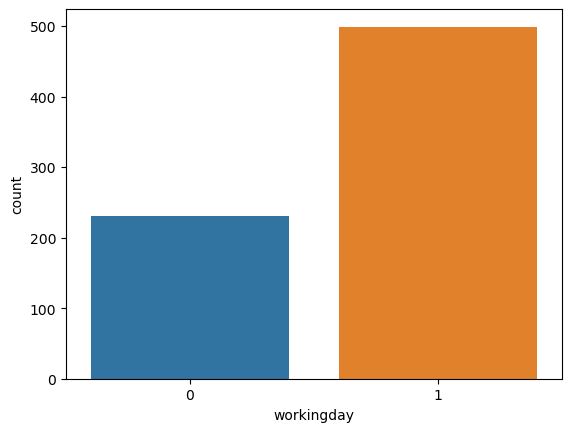

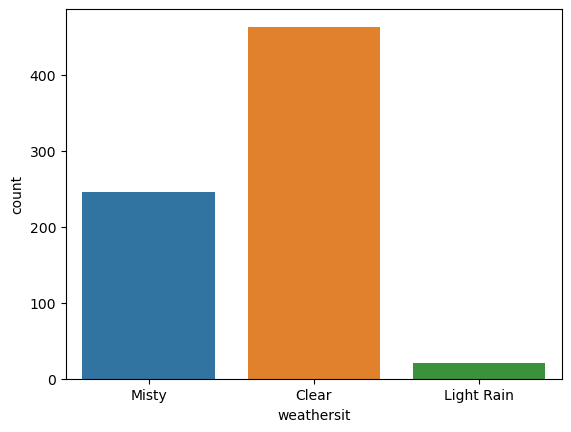

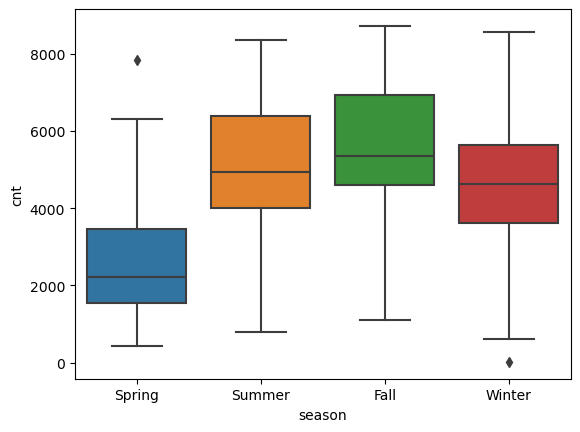

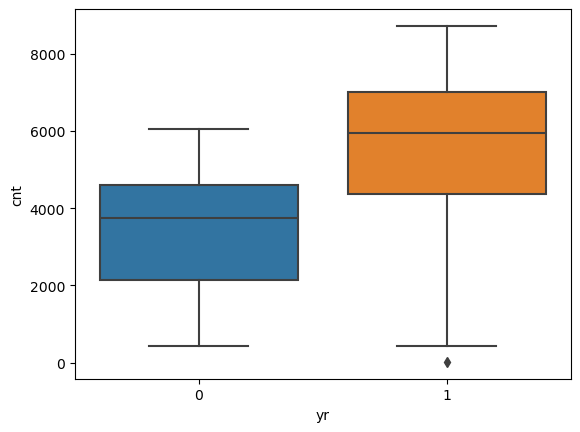

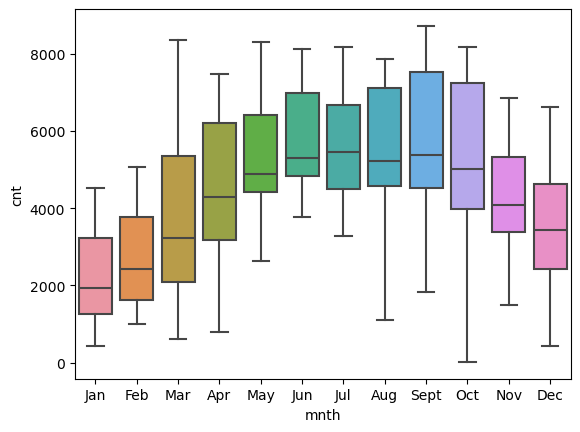

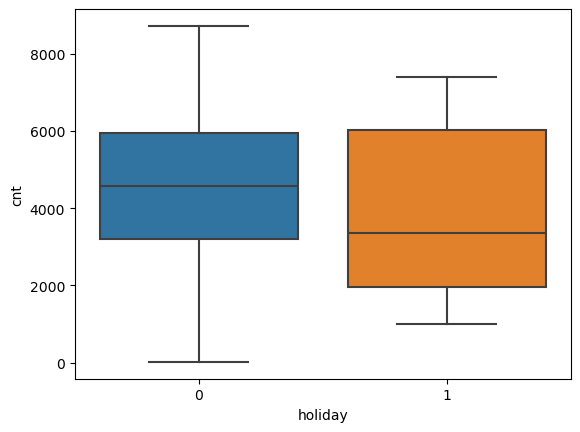

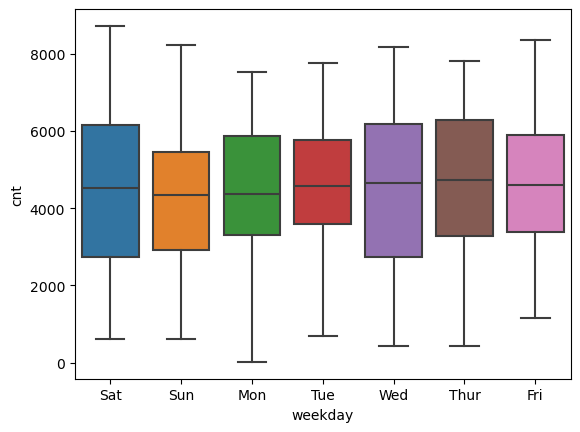

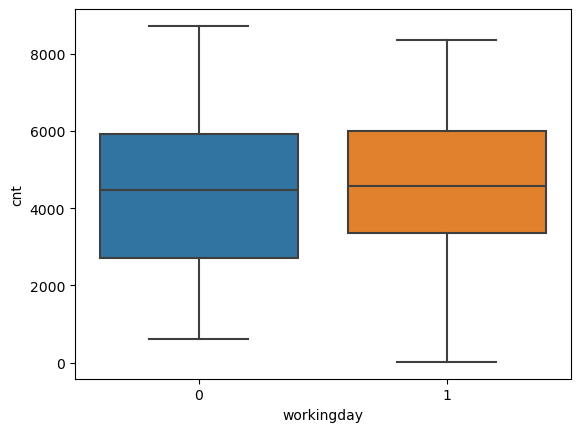

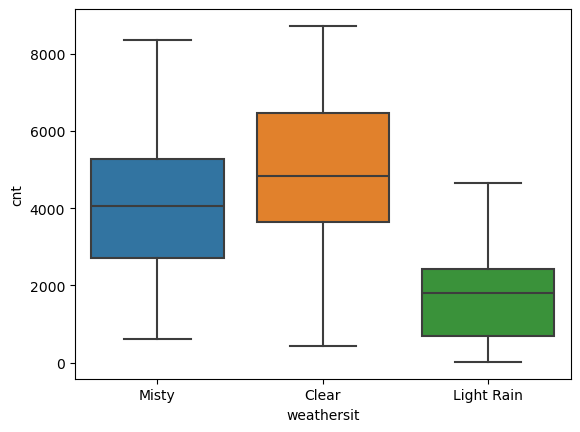

In [12]:
#univariate analysis

for i in num_cols:
    sns.histplot(x=day[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=day[i])
    plt.show()

for i in cat_cols:
    sns.boxplot (x=day[i], y = day["cnt"], data = day)
    plt.show()

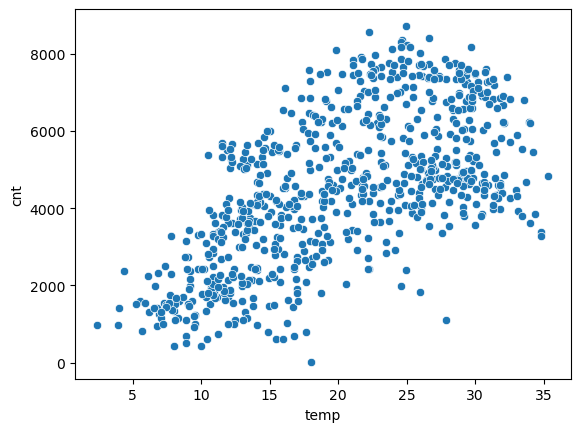

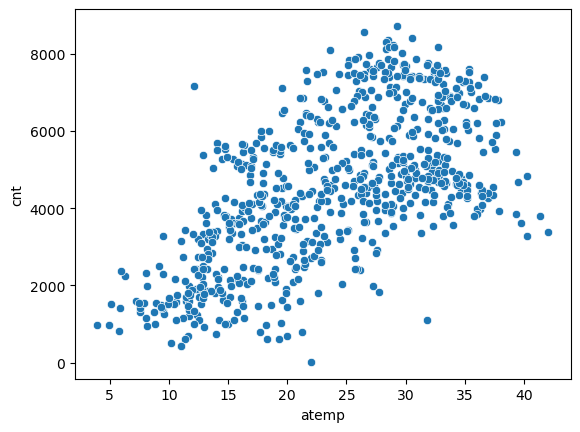

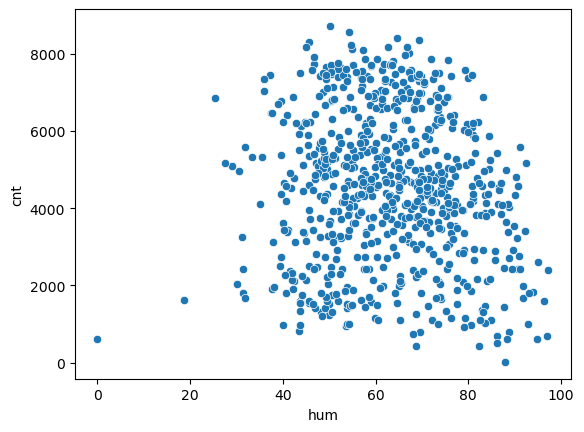

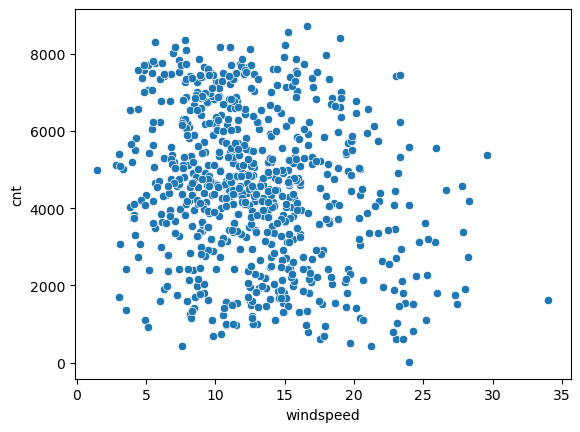

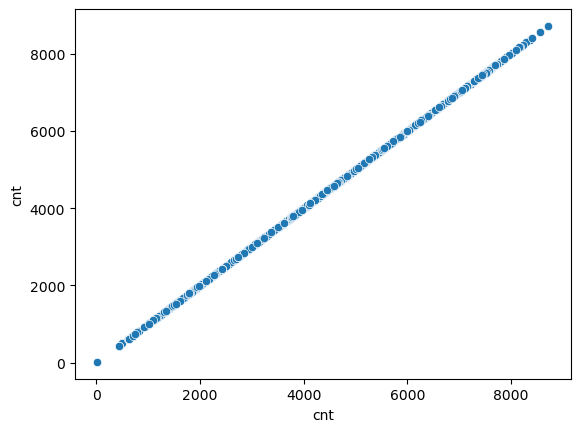

In [13]:
#bivariate

 
for i in num_cols: 
    sns.scatterplot(x=day[i],y=day["cnt"]) 
    plt.show()

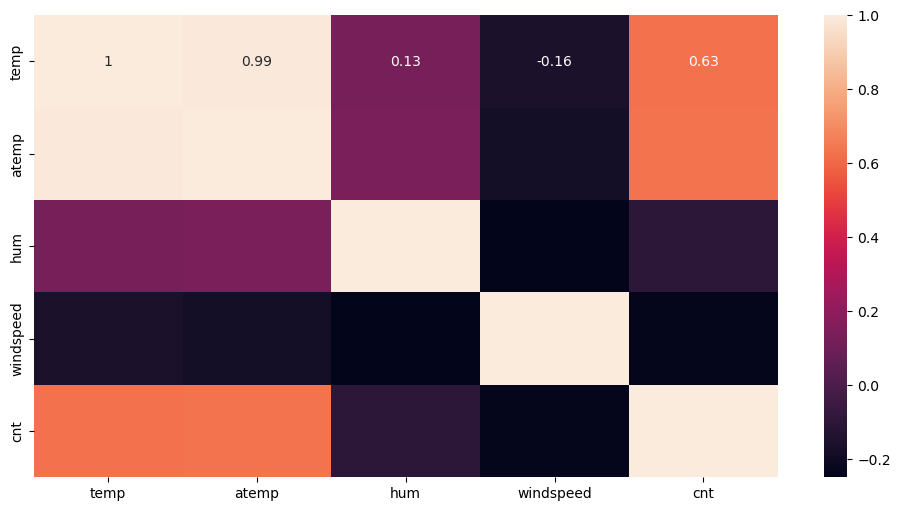

In [14]:
# Multivariate Analysis
plt.figure(figsize=(12,6)) 
sns.heatmap(day[num_cols].corr(),annot=True) 
plt.show()

In [15]:
#Calculate Correlation of the dataset
day_corr = day[num_cols].corr()
print(day_corr)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


In [16]:
## Step 2: Data Preparation for Modeling

day[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [17]:
#Step 2.1: Creating Dummy Variable for all categorical variables - number of dummies = n-1 (only for cat_colums)
day=pd.get_dummies(data= day, columns= ["season", "mnth", "weekday", "weathersit"],drop_first=True,dtype=int)
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#Checking all column names
day.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Rain', 'weathersit_Misty'],
      dtype='object')

In [19]:
## Step 2.2 Splitting into Train and Test 

y=day.pop('cnt')
X=day

#Train_Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [20]:
## Step 2.3 Rescaling the Features

#Normalization - minmax scaler
scaler = MinMaxScaler()

#Fit and transform training set
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#y_train[num_cols] = scaler.fit_transform(y_train[num_cols])
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
## Step 3: Training the Model





In [22]:
#Model 1
#add a constant
X_train_sm = sm.add_constant(X_train[['temp','atemp']])

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

# parameters
lr_model.params

const    1435.873212
temp     1611.017958
atemp    4255.309090
dtype: float64

In [23]:
#Model1 Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           8.38e-61
Time:                        17:50:52   Log-Likelihood:                -4447.7
No. Observations:                 510   AIC:                             8901.
Df Residuals:                     507   BIC:                             8914.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1435.8732    172.475      8.325      0.000    1097.020    1774.726
temp        1611.0180   2023.854      0.796      0.426   -2365.154    5587.190
atemp       4255.3091   2151.989      1.977      0.049      27.395    8483.223
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Model 2

#add a constant
X_train_sm = sm.add_constant(X_train[num_cols])

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.06e-69
Time:                        17:50:52   Log-Likelihood:                -4421.6
No. Observations:                 510   AIC:                             8853.
Df Residuals:                     505   BIC:                             8874.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3951.5206    379.152     10.422      0.000    3206.611    4696.430
temp        2415.5526   1961.276      1.232      0.219   -1437.712    6268.817
atemp       3387.1763   2099.545      1.613      0.107    -737.743    7512.095
hum        -2838.4578    450.338     -6.303      0.000   -3723.224   -1953.692
windspeed  -2044.9415    395.456     -5.171      0.000   -2821.882   -1268.000
==============================================================================
Omnibus:                        2.796   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.462
Skew:                           0.081   Prob(JB):                        0.292
Kurtosis:                       2.701   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Rain', 'weathersit_Misty'],
      dtype='object')

In [26]:
#Model#3 with all variables
X_train_sm=sm.add_constant(X_train)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.81e-180
Time:                        17:50:52   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2132.3460    307.054      6.945      0.000    1529.012    2735.680
yr                     2021.2265     70.196     28.794      0.000    1883.299    2159.155
holiday                  99.0718    209.894      0.472      0.637    -313.350     511.494
workingday              841.2011    106.806      7.876      0.000     631.337    1051.065
temp                   3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp                   513.2207   1203.335      0.426      0.670   -1851.222    2877.663
hum                   -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed             -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
season_Spring          -394.2228    260.924     -1.511      0.131    -906.915     118.469
season_Summer           368.2736    227.759      1.617      0.107     -79.252     815.799
season_Winter           930.7444    243.295      3.826      0.000     452.692    1408.796
mnth_Aug                193.5713    294.433      0.657      0.511    -384.962     772.104
mnth_Dec               -384.8315    292.519     -1.316      0.189    -959.605     189.942
mnth_Feb               -280.8921    286.571     -0.980      0.327    -843.977     282.193
mnth_Jan               -548.1528    292.204     -1.876      0.061   -1122.307      26.002
mnth_Jul               -283.8506    304.748     -0.931      0.352    -882.652     314.951
mnth_Jun                 52.2549    217.168      0.241      0.810    -374.460     478.970
mnth_Mar                 13.5128    213.815      0.063      0.950    -406.614     433.639
mnth_May                222.0003    183.818      1.208      0.228    -139.185     583.185
mnth_Nov               -346.1020    316.564     -1.093      0.275    -968.121     275.918
mnth_Oct                 67.0449    312.229      0.215      0.830    -546.456     680.546
mnth_Sept               754.1233    278.215      2.711      0.007     207.456    1300.790
weekday_Mon            -187.9576    134.168     -1.401      0.162    -451.584      75.669
weekday_Sat             831.6716    119.718      6.947      0.000     596.437    1066.906
weekday_Sun             360.4014    121.552      2.965      0.003     121.563     599.240
weekday_Thur            -84.5755    135.742     -0.623      0.534    -351.295     182.144
weekday_Tue            -160.2692    135.333     -1.184      0.237    -426.187     105.649
weekday_Wed             -51.2569    130.031     -0.394      0.694    -306.756     204.243
weathersit_Light Rain -2216.2460    230.125     -9.631      0.000   -2668.421   -1764.071
weathersit_Misty       -517.3529     90.743     -5.701      0.000    -695.654    -339.052
==============================================================================
Omnibus:                       84.

In [27]:
## Checking VIF
vif = pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,weekday_Sat,19.71
23,weekday_Sun,18.34
7,season_Spring,10.77
9,season_Winter,9.46
8,season_Summer,8.29
18,mnth_Nov,6.79
19,mnth_Oct,6.47


In [28]:
## Remove High p value but low VIF

X = X_train.drop(['weekday_Wed', 'weekday_Thur', 'mnth_Oct', 'mnth_Jun', 'mnth_Mar','mnth_Aug','holiday'], axis =1)



In [29]:
##Model 4

X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.77e-186
Time:                        17:50:52   Log-Likelihood:                -4099.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     487   BIC:                             8342.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2284.7027    403.107      5.668      0.000    1492.659    3076.747
yr                     2020.1708     69.419     29.101      0.000    1883.773    2156.568
workingday              746.8594    229.203      3.259      0.001     296.510    1197.209
temp                   3578.8559   1164.504      3.073      0.002    1290.783    5866.929
atemp                   352.5162   1177.114      0.299      0.765   -1960.334    2665.366
hum                   -1312.9929    327.669     -4.007      0.000   -1956.813    -669.172
windspeed             -1607.1034    225.407     -7.130      0.000   -2049.994   -1164.213
season_Spring          -498.1861    192.382     -2.590      0.010    -876.186    -120.186
season_Summer           250.5360    149.812      1.672      0.095     -43.821     544.893
season_Winter           868.0603    157.689      5.505      0.000     558.227    1177.894
mnth_Dec               -435.2822    157.709     -2.760      0.006    -745.156    -125.409
mnth_Feb               -295.5043    186.120     -1.588      0.113    -661.201      70.193
mnth_Jan               -563.7849    184.529     -3.055      0.002    -926.356    -201.214
mnth_Jul               -435.7640    156.651     -2.782      0.006    -743.558    -127.970
mnth_May                196.4556    150.329      1.307      0.192     -98.919     491.830
mnth_Nov               -414.8543    163.541     -2.537      0.012    -736.188     -93.520
mnth_Sept               619.1086    145.029      4.269      0.000     334.150     904.068
weekday_Mon            -141.5182    106.214     -1.332      0.183    -350.213      67.176
weekday_Sat             787.7347    248.050      3.176      0.002     300.355    1275.115
weekday_Sun             312.4097    249.205      1.254      0.211    -177.240     802.060
weekday_Tue            -113.2567    108.069     -1.048      0.295    -325.595      99.081
weathersit_Light Rain -2231.7212    227.853     -9.795      0.000   -2679.417   -1784.025
weathersit_Misty       -510.6693     89.767     -5.689      0.000    -687.048    -334.290
==============================================================================
Omnibus:                       84.378   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.018
Skew:                          -0.807   Prob(JB):                     4.15e-51
Kurtosis:                       5.883   Cond. No.                         88.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
## Checking VIF
vif = pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,380.65
3,atemp,369.45
4,hum,35.51
1,workingday,19.86
6,season_Spring,6.19
17,weekday_Sat,5.52
5,windspeed,5.36
18,weekday_Sun,5.30
8,season_Winter,4.59
7,season_Summer,3.89


In [31]:

## Remove features with high p value 

X = X.drop(['weekday_Sun','atemp','weekday_Tue','mnth_Feb','mnth_May','weekday_Mon'], axis=1)

#['yr', , 'workingday', 'temp', , 'hum', 'windspeed','season_Spring', 'season_Summer', 'season_Winter',  'mnth_Dec', , 'mnth_Jan', 'mnth_Jul',, 'mnth_Nov', 'mnth_Sept', ,'weekday_Sat', , ,, 'weathersit_Light Rain', 'weathersit_Misty'],

In [32]:
#Model 5
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.20e-190
Time:                        17:50:52   Log-Likelihood:                -4104.5
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     493   BIC:                             8315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2360.5124    321.786      7.336      0.000    1728.271    2992.754
yr                     2008.7006     69.435     28.929      0.000    1872.275    2145.126
workingday              452.5618     93.777      4.826      0.000     268.310     636.814
temp                   4123.6372    317.751     12.978      0.000    3499.324    4747.951
hum                   -1286.0885    325.432     -3.952      0.000   -1925.494    -646.683
windspeed             -1636.5103    221.561     -7.386      0.000   -2071.831   -1201.189
season_Spring          -541.9959    182.261     -2.974      0.003    -900.101    -183.891
season_Summer           366.1029    131.545      2.783      0.006     107.645     624.561
season_Winter           902.3271    154.726      5.832      0.000     598.323    1206.331
mnth_Dec               -346.2562    150.413     -2.302      0.022    -641.785     -50.727
mnth_Jan               -404.0113    155.649     -2.596      0.010    -709.828     -98.195
mnth_Jul               -446.9141    156.574     -2.854      0.004    -754.550    -139.278
mnth_Nov               -383.3660    160.371     -2.390      0.017    -698.461     -68.271
mnth_Sept               620.3923    144.648      4.289      0.000     336.189     904.596
weekday_Sat             543.5626    120.979      4.493      0.000     305.865     781.261
weathersit_Light Rain -2218.2344    227.425     -9.754      0.000   -2665.076   -1771.392
weathersit_Misty       -504.9655     90.066     -5.607      0.000    -681.926    -328.005
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
## Checking VIF
vif = pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,season_Spring,4.50
7,season_Winter,4.11
6,season_Summer,2.88
15,weathersit_Misty,2.32
0,yr,2.09
13,weekday_Sat,1.86


In [34]:
#Removing features with high VIF (VIF>5)

X = X.drop (['hum', 'temp'], axis=1)

In [35]:
#Model6
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.73e-161
Time:                        17:50:52   Log-Likelihood:                -4179.5
No. Observations:                 510   AIC:                             8389.
Df Residuals:                     495   BIC:                             8453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4761.2557    163.827     29.063      0.000    4439.374    5083.138
yr                     2137.4998     79.205     26.987      0.000    1981.880    2293.119
workingday              488.6702    108.200      4.516      0.000     276.082     701.259
windspeed             -1669.0912    245.202     -6.807      0.000   -2150.856   -1187.326
season_Spring         -2162.0242    152.011    -14.223      0.000   -2460.690   -1863.359
season_Summer          -421.7045    134.870     -3.127      0.002    -686.693    -156.716
season_Winter          -162.0228    151.610     -1.069      0.286    -459.902     135.856
mnth_Dec               -972.9484    164.701     -5.907      0.000   -1296.548    -649.348
mnth_Jan              -1061.2655    170.154     -6.237      0.000   -1395.578    -726.953
mnth_Jul               -129.6861    178.760     -0.725      0.469    -480.909     221.537
mnth_Nov               -901.3781    179.104     -5.033      0.000   -1253.275    -549.481
mnth_Sept               437.2485    166.058      2.633      0.009     110.982     763.515
weekday_Sat             573.4184    139.408      4.113      0.000     299.514     847.323
weathersit_Light Rain -2756.0327    240.031    -11.482      0.000   -3227.638   -2284.427
weathersit_Misty       -771.0716     84.803     -9.093      0.000    -937.690    -604.454
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666   Prob(JB):                     4.42e-38
Kurtosis:                       5.515   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
## Checking VIF
vif = pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.26
1,workingday,3.56
3,season_Spring,3.03
5,season_Winter,3.01
4,season_Summer,2.27
0,yr,1.91
9,mnth_Nov,1.78
7,mnth_Jan,1.64
11,weekday_Sat,1.63
13,weathersit_Misty,1.57


In [71]:
X.columns

Index(['yr', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Sept', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Misty'],
      dtype='object')

<Axes: ylabel='Density'>

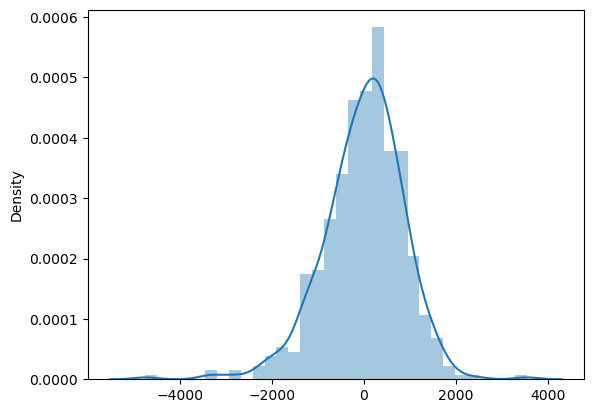

In [37]:
## Step 4: Residual Analysis

y_train_pred= lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [38]:
##Step 5 - Prediction and evaluation on the test set



#transform test set
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
X_test[num_cols] = scaler.transform(X_test[num_cols])
#y_test[num_cols] = scaler.transform(y_test[num_cols])
X_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
#adding constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Misty
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,1,0,0,0,0


In [40]:
#Predict
X_test_sm =X_test_sm.drop(['hum', 'temp','weekday_Wed', 'weekday_Thur', 'mnth_Oct', 'mnth_Jun', 'mnth_Mar','mnth_Aug','holiday','weekday_Sun','atemp','weekday_Tue','mnth_Feb','mnth_May','weekday_Mon'], axis=1)
y_test_pred = lr_model.predict(X_test_sm)

In [41]:
#evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7846883316457447

In [42]:
#Model 7 - Automated RFE

#Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)



In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 12),
 ('mnth_Oct', False, 3),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 15),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 11),
 ('weekday_Tue', False, 14),
 ('weekday_Wed', False, 9),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Misty', True, 1)]

In [44]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Misty'],
      dtype='object')

In [45]:
#Building Model using statsmodel

#creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [46]:
#adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
#Running linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [48]:
#Summary

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.11e-191
Time:                        17:50:52   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1751.88

In [49]:
# Dropping Holiday feature as p value >0.05

X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [50]:
#Rebuilding the model without Holiday

X_train_lm = sm.add_constant(X_train_new)

In [51]:
#Running linear model
lm=sm.OLS(y_train,X_train_lm).fit()

In [52]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.11e-191
Time:                        17:50:52   Log-Likelihood:                -4108.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1595.94

In [53]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Misty'],
      dtype='object')

In [54]:

X_train_new = X_train_new.drop(['const'], axis = 1)

In [55]:
## Checking VIF
vif = pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_Sat,4.91
5,season_Spring,4.80
11,weekday_Sun,4.76
7,season_Winter,3.69
6,season_Summer,3.04
13,weathersit_Misty,2.31


In [56]:
#Model# 8
# Dropping hum, temp and workingday feature as VIF value > 5

X_train_new = X_train_new.drop(["hum", "temp", "workingday"], axis = 1)

In [57]:
#Rebuilding the model without Holiday

X_train_lm = sm.add_constant(X_train_new)

In [58]:
#Running linear model
lm=sm.OLS(y_train,X_train_lm).fit()

In [59]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.39e-148
Time:                        17:50:53   Log-Likelihood:                -4219.2
No. Observations:                 510   AIC:                             8462.
Df Residuals:                     498   BIC:                             8513.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5120.91

In [60]:
## Checking VIF
vif = pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.87
2,season_Spring,2.09
3,season_Summer,2.04
0,yr,1.84
4,season_Winter,1.78
10,weathersit_Misty,1.51
5,mnth_Jul,1.21
7,weekday_Sat,1.21
8,weekday_Sun,1.20
6,mnth_Sept,1.16


In [61]:
#Model# 9
# Dropping weekday_Sat and mnth_Jul feature as p value value > 0.05

X_train_new = X_train_new.drop(['weekday_Sat', 'mnth_Jul'], axis = 1)

In [62]:
#Rebuilding the model without Holiday

X_train_lm = sm.add_constant(X_train_new)

#Running linear model
lm=sm.OLS(y_train,X_train_lm).fit()

In [63]:
#Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.77e-150
Time:                        17:50:53   Log-Likelihood:                -4219.7
No. Observations:                 510   AIC:                             8459.
Df Residuals:                     500   BIC:                             8502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5107.06

In [64]:
## Checking VIF
vif = pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.49
2,season_Spring,1.91
3,season_Summer,1.87
0,yr,1.78
4,season_Winter,1.64
8,weathersit_Misty,1.51
6,weekday_Sun,1.15
5,mnth_Sept,1.13
7,weathersit_Light Rain,1.08


In [65]:
#Residual Analysis

y_train_predict = lm.predict(X_train_lm)

<Axes: ylabel='Density'>

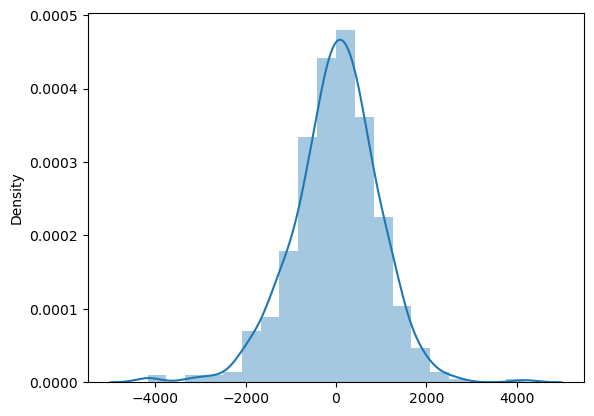

In [66]:
#Plotting the histogram of the error term

fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins =20)


In [ ]:
Conclusion: Model 6 is selected as the results between model 11 and 6 are close to each other after eliminating high p value and high VIF features

In [ ]:
Conclusion
Significant variables to predict the demand for shared bikes:
'yr', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Sept', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Misty'
Hence the company should come up with new offers during spring with focus on weekends when the weather is not heavy rain/snow with focus on September as this is when business would be at its best.